# Material Balances XVII

This lecture solves reactor design problems involving semi-batch reactors; membrane reactors; recycle reactors, and packed beds with pressure drops.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

## Example Problem 01

The synthesis of Methyl Bromide is carried out in the liquid phase using a well-mixed tank reactor. 
			
$$C\!N\!Br + C\!H_3N\!H_2 \longrightarrow C\!H_3Br + N\!C\!N\!H_2$$

The tank is initially filled with 5L of a solvent solution containing Bromine Cyanide (A) at a concentration of 0.05M.  At time zero, you turn on the feed to the reactor, which is a solvent solution containing methylamine (B) at 0.025M; the feed enters the reactor at a total volumetric flowrate of 0.05 L s$^{-1}$. This reaction is first order in A and first order in B, and we are given a rate constant of:

$$k = 2.2 \ \textrm{L} \ \textrm{mol}^{-1} \ \textrm{s}^{-1}$$

All species are dissolved in an inert solvent and present at relatively low concentrations, so we can assume that the density of all fluid in the system is approximately equal to the density of the solvent. Plot the concentrations of all species in the reactor as well as the rate of reaction as a function of time.

How long does it take to reach 90% conversion of species A in this system?

### Solution to Example Problem 01

We'll use the shorthand:

$$A + B \longrightarrow C + D$$

Write balances on species:

\begin{align}
    \frac{dN_A}{dt} &= R_AV \\
    \frac{dN_B}{dt} &= F_{Bf} + R_BV \\
    \frac{dN_C}{dt} &= R_CV \\
    \frac{dN_D}{dt} &= R_DV
\end{align}

The only new concept above is that, for species B, we have an inlet molar flowrate, so that (with respect to species B), this looks like a transient CSTR balance with no outflow. We can calculate the value of the feed molar flowrate of B using information in the problem statement:

$$F_{Bf} = C_{Bf}Q_f$$

Define Production rates $R_j$:

\begin{align}
    R_A &= -r \\
    R_B &= -r \\
    R_C &= r \\
    R_D &= r
\end{align}

Reaction rate is given by:

$$r = kC_AC_B$$

Concentrations are given by:

\begin{align}
    C_A = \frac{N_A}{V} \\
    C_B = \frac{N_B}{V}
\end{align}

Volume is clearly not going to be constant in this reactor since we have an inlet flow and no outlet flow.  We aren't given densities or molecular weights for these species, but we're told that the density is constant.  This makes it relatively easy to derive an equation that describes the change in volume with time.  Starting with a total mass balance:

$$\frac{dm}{dt} = \dot{m}_{f}$$

We can express mass ($m$) and mass flowrate ($\dot{m}_{f}$) in terms of volume ($V$), volumetric flowrate ($Q_f$), and density ($\rho$):

$$\frac{d(\rho V)}{dt} = \rho Q_f$$

Since density is time invariant in this problem, the ODE simplifies to:

$$\frac{dV}{dt} = Q_f$$

This can be solved analytically since it is not coupled to any other time dependent terms to give:

$$V = V_0 + Q_ft$$

Alternatively, you can use `solve_ivp()` to integrated the volume differential equation alongside the material balances.  This approach is more general, so we'll use that one to solve this problem.

In [ ]:
# ##############################################################
# # Globals for P01                                            #
# ##############################################################

# V0  = 5.0 #L
# CA0 = 0.05 #mol/L
# Qf  = 0.05 #L/s
# CBf = 0.025 #mol/L
# FBf = CBf*Qf
# NA0 = CA0*V0
# NB0 = 0.0
# NC0 = 0.0
# ND0 = 0.0
# k   = 2.2  #L/mol/s

In [ ]:
# def P01(t, var):
    
#     NA, NB, NC, ND, V = var
        
#     CA = NA/V
#     CB = NB/V
    
#     r  = k*CA*CB
    
#     RA = -r
#     RB = -r
#     RC =  r
#     RD =  r
    
#     D1 =       RA*V
#     D2 = FBf + RB*V
#     D3 =       RC*V
#     D4 =       RD*V
#     D5 = Qf
    
#     return [D1, D2, D3, D4, D5]

In [ ]:
# tspan = (0.0, 5000.0)
# var0  = (NA0, NB0, NC0, ND0, V0)
# ans1  = solve_ivp(P01, tspan, var0, atol = 1e-8, rtol = 1e-8)

# t     = ans1.t
# NA    = ans1.y[0, :]
# NB    = ans1.y[1, :]
# NC    = ans1.y[2, :]
# ND    = ans1.y[3, :]
# V     = ans1.y[4, :]

# XA    = (NA0 - NA)/NA0
# CA    = NA/V
# CB    = NB/V
# CC    = NC/V
# CD    = ND/V
# r     = k*CA*CB

In [ ]:
# plt.figure(figsize = (5, 5))
# plt.plot(t, CA, label = 'CA')
# plt.plot(t, CB, label = 'CB')
# plt.plot(t, CC, marker = 'o', label = 'CC')
# plt.plot(t, CD, label = 'CD')
# plt.xlim(0.0, max(tspan))
# plt.xticks(fontsize = 11)
# plt.xlabel('time (s)', fontsize = 14)
# plt.ylim(0.0, 0.06)
# plt.yticks(fontsize = 11)
# plt.ylabel('Concentration (mol/L)', fontsize = 14)
# plt.legend()
# # plt.show()

# plt.figure(figsize = (5, 5))
# plt.plot(t, V)
# plt.xlim(0.0, max(tspan))
# plt.xticks(fontsize = 11)
# plt.xlabel('time (s)', fontsize = 14)
# #plt.ylim(0.0, 10)
# plt.yticks(fontsize = 11)
# plt.ylabel('Reactor Volume (L)', fontsize = 14)
# # plt.show()

# plt.figure(figsize = (5, 5))
# plt.plot(t, r)
# # plt.xlim(0.0, max(tspan))
# plt.xlim(0.0, 200)
# plt.xticks(fontsize = 11)
# plt.xlabel('time (s)', fontsize = 14)
# plt.yticks(fontsize = 11)
# plt.ylabel('Reaction Rate (mol/L/s)', fontsize = 14)
# plt.show()

In [ ]:
# itp1 = interp1d(XA, t)
# print(f'This reactor reaches 90% conversion at t = {itp1(0.9):0.3f}')

# plt.figure(figsize = (5, 5))
# plt.plot(t, XA, label = 'XA')
# plt.xlim(0.0, 400)
# plt.xticks(fontsize = 11)
# plt.xlabel('time (s)', fontsize = 14)
# plt.ylim(0.0, 1.0)
# plt.yticks(fontsize = 11)
# plt.ylabel('XA', fontsize = 14)
# # plt.legend()
# plt.show()

## Example Problem 02

You are designing a flow reactor in order to perform gas-phase propane dehydrogenation.  The purpose of this reaction is "on purpose" generation of propylene, which has historically been produced as a side product of ethylene synthesis via naphtha cracking. One of the consequences of the shale gas boom is that it greatly expanded the supply of ethane (and thus decrease the cost of ethane).  Accordingly, the majority of our ethylene production has shifted to ethane pyrolysis, which does not produce significant quantities of propylene.  Hence your interest in an on-purpose synthesis of propylene!
			
$$C_3H_8 \longleftrightarrow C_3H_6 + H_2$$

The reaction has an elementary rate law, and it is performed at 500K and 8.2atm.  At this temperature, you find that the forward rate constant and the concentration-based equilibrium constant are:

\begin{align*}
    k_f  = 0.7  \ \textrm{min}^{-1} \\
    K_C = 0.05 \ \textrm{mol} \ \textrm{L}^{-1}				
\end{align*}			

If the feed rate of propane to the reactor is 10 moles per minute, find the PFR volume required to achieve 95\% conversion of propane.

### Solution to Example Problem 02

#### Material Balances

Our instinct for solving this problem is to write a balance on each species:

$$\frac{dF_j}{dV} = R_j$$

We can then specify a production rate for each species in terms of the reaction rate:

$$R_j = \sum_i \nu_{i,j}r_i$$

The reaction rate in this problem is elementary, so:

$$r = k_fC_A - k_rC_BC_C$$

And we can define concentrations in terms of flowrates:

$$C_j = \frac{F_j}{Q}$$

Where Q is given by:

$$Q = \frac{F_T RT}{P}$$

In terms of parameters, we are given $k_f$, $T$, $P$, and $F_{Af}$.  We can infer that $F_{Bf}$ and $F_{Cf}$ are both zero.  Finally, we can calculate the reverse rate constant:

$$k_r = \frac{k_f}{K_C}$$

With this, we can solve the problem by integrating the coupled ODEs with `solve_ivp()` and using `interp1d()` to back out the volume where we hit our conversion target.

In [28]:
# ########################################
# # Globals for P02                      #
# ########################################

# kf  = 0.7  #1/min
# KC  = 0.05 #mol/L
# kr  = kf/KC #L/mol/min
# T   = 500 #K
# P   = 8.2 #atm
# R   = 0.08206 #L*atm/mol/K
# FAf = 10.0 #mol/min
# FBf = 0.0
# FCf = 0.0
# XA_target = 0.95

In [3]:
# def P02(V, var):
#     FA, FB, FC = var
    
#     FT = FA + FB + FC
    
#     Q  = FT*R*T/P
    
#     CA = FA/Q
#     CB = FB/Q
#     CC = FC/Q
    
#     r  = kf*CA - kr*CB*CC
    
#     RA = -r
#     RB =  r
#     RC =  r
    
#     dA = RA
#     dB = RB
#     dC = RC
    
#     return [dA, dB, dC]

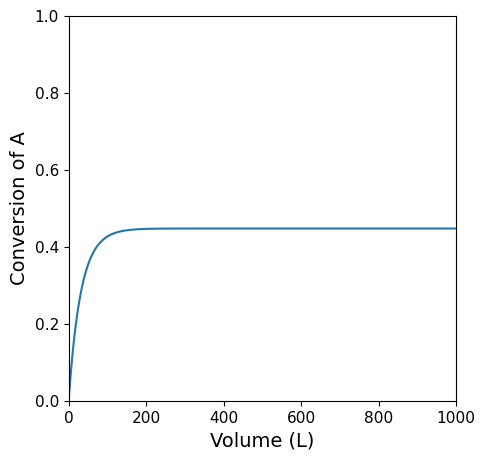

In [4]:
# Vspan = (0.0, 1000.0)
# var0  = (FAf, FBf, FCf)
# ans2  = solve_ivp(P02, Vspan, var0, atol = 1e-8, rtol =  1e-8)

# V     = ans2.t
# FA    = ans2.y[0, :]
# FB    = ans2.y[1, :]
# FC    = ans2.y[2, :]

# XA    = (FAf - FA)/FAf
# # itp1 = interp1d(XA, V)
# # itp1(XA_target)

# plt.figure(figsize = (5, 5))
# plt.plot(V, XA)
# plt.xlim(0.0, max(Vspan))
# plt.xticks(fontsize = 11)
# plt.xlabel('Volume (L)', fontsize = 14)
# plt.ylim(0.0, 1.0)
# plt.yticks(fontsize = 11)
# plt.ylabel('Conversion of A', fontsize = 14)
# plt.show()

#### Always assess equilibrium limits for reversible reactions!

We failed to consider the equilibrium limit before we asked for 95% conversion.  If we solve the equilibrium problem, we can see how attainable conversion depends on the specifications for this problem.  The best way to solve this is using the methods from Unit 02, where we solve an algebraic equation given by:

$$K_C - \prod_j C_j^{\nu_j} = 0$$

To do so, we can develop a mole table that relates all species flowrates to fractional conversion.

In [27]:
# def eqns2a(XA):
      
#     FA = FAf - FAf*XA
#     FB = FBf + FAf*XA
#     FC = FCf + FAf*XA
#     FT = FA + FB + FC
    
#     Q  = FT*R*T/P
    
#     CA = FA/Q
#     CB = FB/Q
#     CC = FC/Q
        
#     KC_comp = CC*CB/CA
    
#     eqn1    = KC_comp - KC
#     return eqn1

In [6]:
# XAguess = 0.7
# ans3    = opt.newton(eqns2a, XAguess)
# print(f'The equilibrium conversion of propane at these conditions is {ans3:0.3f}')

The equilibrium conversion of propane at these conditions is 0.447


#### Example 02b: Increasing the attainable equilibrium conversion

From the above analysis of equilibrium limits for these conditions, we learn that it is impossible to attain the requested conversion under the given conditions. Since this is a reaction where the number of moles increase with reaction (assuming we do not change the temperature), the only way we can improve the equilibrium limit so that we can reach the requested 95% conversion is to either reduce the system pressure, add an inert gas diluent (which accomplishes the same thing as reducing the pressure in terms of the equilibrium analysis), or do some combination of the two if it is more practical. 

We adapt the equilibrium problem below by adding diluent and reducing the operating pressure.

In [26]:
# def eqns2b(XA):
        
#     FA = FAf - FAf*XA
#     FB = FBf + FAf*XA
#     FC = FCf + FAf*XA
#     FI = FIf
#     FT = FA + FB + FC + FI
    
#     Q  = FT*R*T/P
    
#     CA = FA/Q
#     CB = FB/Q
#     CC = FC/Q
        
#     KC_comp = CC*CB/CA
    
#     eqn1    = KC_comp - KC
#     return eqn1

In [25]:
# ##########################################################
# # Redefining globals at adjusted pressure and w/diluent  #
# ##########################################################

# KC  = 0.05 #mol/L
# T   = 500 #K
# P   = 8.2 #atm
# R   = 0.08206 #L*atm/mol/K
# FAf = 10.0 #mol/min
# FBf = 0.0
# FCf = 0.0
# FIf = 0.0 #mol/min

# # Solve problem with current set of globals
# XAguess = 0.95
# ans3    = opt.newton(eqns2b, XAguess)
# print(f'The equilibrium conversion of propane at these conditions is \n {ans3:0.3f}')

#### Returning to the material balances under conditions where we can reach 95% conversion

Next, we re-solve the material balances with conditions where it will be possible to reach 95% conversion to solve for the required reactor volume.  Specifically, we reduce the system pressure to 1 atm, and we add a diluent (e.g., $N_2$ gas) to the feed stream at 100 moles per minute.

In [24]:
# def P02b(V, var):
#     FA, FB, FC = var
#     FI = FIf
    
#     FT = FA + FB + FC + FI
    
#     Q  = FT*R*T/P
    
#     CA = FA/Q
#     CB = FB/Q
#     CC = FC/Q
    
#     r  = kf*CA - kr*CB*CC
    
#     RA = -r
#     RB =  r
#     RC =  r
    
#     dA = RA
#     dB = RB
#     dC = RC
    
#     return [dA, dB, dC]

In [23]:
# Vspan = (0.0, 30000.0)
# var0  = (FAf, FBf, FCf)
# ans2  = solve_ivp(P02b, Vspan, var0, atol = 1e-8, rtol =  1e-8)

# V     = ans2.t
# FA    = ans2.y[0, :]
# FB    = ans2.y[1, :]
# FC    = ans2.y[2, :]

# XA    = (FAf - FA)/FAf

# plt.figure(1, figsize = (5, 5))
# plt.plot(V, XA)
# plt.xlim(0.0, max(Vspan))
# plt.xticks(fontsize = 11)
# plt.xlabel('Volume (L)', fontsize = 14)
# plt.ylim(0.0, 1.0)
# plt.yticks(fontsize = 11)
# plt.ylabel('Conversion of A', fontsize = 14)
# plt.show(1)

# itp1 = interp1d(XA, V, kind = 'cubic')
# Vopt = itp1(XA_target)
# print(f'The Volume required for XA = {XA_target:0.2f} is {Vopt:0.0f}L')